# Driver Standing and Constructor Standings Predictions

This projects aims to predict future standings based on past performance trends

Setting up the dataset for testing and training

In [ ]:
#Loading data sets
import pandas as pd

driver_standings = pd.read_csv('f1/driver_standings.csv')
constructor_standings = pd.read_csv('f1/constructor_standings.csv')
races = pd.read_csv('f1/races.csv')
drivers = pd.read_csv('f1/drivers.csv')
constructors = pd.read_csv('f1/constructors.csv')
results = pd.read_csv('f1/results.csv')

In [ ]:
# Cleaning the datasets
driver_standings.drop(['positionText'], axis=1, inplace=True)
constructor_standings.drop(['positionText'], axis=1, inplace=True)
races.drop(['url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1, inplace=True)
drivers.drop(['driverRef', 'number', 'forename', 'dob', 'nationality', 'url'], axis=1, inplace=True)
constructors.drop(['url', 'name', 'nationality'], axis=1, inplace=True)


In [ ]:
# Merging the datasets
merged = pd.merge(results, races, on='raceId', how='outer')
merged = pd.merge(merged, driver_standings, on=['raceId', 'driverId'], how='left')
merged = pd.merge(merged, constructor_standings, on=['raceId', 'constructorId'], how='left')
merged = pd.merge(merged, drivers, on='driverId', how='left')
merged = pd.merge(merged, constructors, on='constructorId', how='left')

In [ ]:
# Filter to specific years (2018 - 2022)
merged = merged[(merged['year'] >= 2018) & (merged['year'] <= 2022)]

# Sort the merged dataset by date and round
merged.sort_values(by=['year', 'round'], ascending=[True, True])


,resultId,raceId,driverId,constructorId,number,grid,position_x,positionText,positionOrder,points_x,...,points_y,position_y,wins_x,constructorStandingsId,points,position,wins_y,code,surname,constructorRef
23780,23782.0,989,20.0,6.0,5,3.0,1,1,1.0,25.0,...,25.0,1.0,1.0,26933.0,40.0,1.0,1.0,VET,Vettel,ferrari
23781,23783.0,989,1.0,131.0,44,1.0,2,2,2.0,18.0,...,18.0,2.0,0.0,26934.0,22.0,2.0,0.0,HAM,Hamilton,mercedes
23782,23784.0,989,8.0,6.0,7,2.0,3,3,3.0,15.0,...,15.0,3.0,0.0,26933.0,40.0,1.0,1.0,RAI,Räikkönen,ferrari
23783,23785.0,989,817.0,9.0,3,8.0,4,4,4.0,12.0,...,12.0,4.0,0.0,26935.0,20.0,3.0,0.0,RIC,Ricciardo,red_bull
23784,23786.0,989,4.0,1.0,14,10.0,5,5,5.0,10.0,...,10.0,5.0,0.0,26936.0,12.0,4.0,0.0,ALO,Alonso,mclaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841.0,1096,854.0,210.0,47,12.0,16,16,16.0,0.0,...,12.0,16.0,0.0,28395.0,37.0,8.0,0.0,MSC,Schumacher,haas
25836,25842.0,1096,825.0,210.0,20,16.0,17,17,17.0,0.0,...,25.0,13.0,0.0,28395.0,37.0,8.0,0.0,MAG,Magnussen,haas
25837,25843.0,1096,1.0,131.0,44,5.0,18,18,18.0,0.0,...,240.0,6.0,0.0,28394.0,515.0,3.0,1.0,HAM,Hamilton,mercedes
25838,25844.0,1096,849.0,3.0,6,20.0,19,19,19.0,0.0,...,2.0,20.0,0.0,28400.0,8.0,10.0,0.0,LAT,Latifi,williams


In [ ]:
# Renaming columns for clarity
merged.rename(columns={
    'position': 'race_finish_position',
    'positionOrder': 'race_position_order',
    'points_x': 'driver_season_points',
    'points_y': 'constructor_season_points',
    'wins_x': 'driver_season_wins',
    'wins_y': 'constructor_season_wins',
    'position_x': 'driver_championship_standings',
    'position_y': 'constructor_championship_standings'
}, inplace=True)

In [ ]:
# Handling missing values
# For numerical columns: filling with the mean or median
numerical_cols = merged.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    merged[col].fillna(merged[col].mean(), inplace=True)

# For categorical columns: filling with the mode
categorical_cols = merged.select_dtypes(include=['object']).columns
for col in categorical_cols:
    merged[col].fillna(merged[col].mode()[0], inplace=True)

In [ ]:
# Save the cleaned and preprocessed merged dataset
merged.to_csv('f1/merged_dataset.csv', index=False)


In [ ]:
print(merged.columns)

Index(['resultId', 'raceId', 'driverId', 'number', 'grid',
       'driver_championship_standings', 'positionText', 'race_position_order',
       'driver_season_points', 'laps', 'time_x', 'milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
       'round', 'name', 'date', 'time_y', 'driverStandingsId',
       'constructor_season_points', 'constructor_championship_standings',
       'driver_season_wins', 'constructorStandingsId', 'points',
       'race_finish_position', 'constructor_season_wins', 'code', 'surname',
       'constructorRef', 'circuitId_1', 'circuitId_3', 'circuitId_4',
       'circuitId_5', 'circuitId_6', 'circuitId_7', 'circuitId_9',
       'circuitId_10', 'circuitId_11', 'circuitId_13', 'circuitId_14',
       'circuitId_15', 'circuitId_17', 'circuitId_18', 'circuitId_20',
       'circuitId_21', 'circuitId_22', 'circuitId_24', 'circuitId_32',
       'circuitId_34', 'circuitId_39', 'circuitId_69', 'circuitId_70',
       'cir

Creating the model

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2

In [ ]:
# Loading the merged dataset
file_path = 'f1/merged_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# Convert target columns to numeric (float) and handle any missing or non-numeric values
data['driver_championship_standings'] = pd.to_numeric(data['driver_championship_standings'], errors='coerce').fillna(0)
data['constructor_championship_standings'] = pd.to_numeric(data['constructor_championship_standings'], errors='coerce').fillna(0)

In [ ]:
# Selecting features and target
feature_columns = ['grid', 'driver_season_points', 'driver_season_wins', 'constructor_season_points', 'constructor_season_wins', 'laps', 'race_position_order']
X = data[feature_columns]
y_driver = data['driver_championship_standings']  # Target for driver standings
y_constructor = data['constructor_championship_standings']  # Target for constructor standings

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train_driver, y_test_driver = train_test_split(X, y_driver, test_size=0.2, random_state=42)
_, _, y_train_constructor, y_test_constructor = train_test_split(X, y_constructor, test_size=0.2, random_state=42)

In [ ]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define a function to create the Keras model
def create_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Correct the input shape for model creation
input_shape = (X_train_scaled.shape[1], )  # Number of features

# Create and train the model for driver standings
model_driver = create_model(input_shape)
history_driver = model_driver.fit(X_train_scaled, y_train_driver, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model for driver standings
y_pred_driver = model_driver.predict(X_test_scaled)
mse_driver = tf.keras.losses.MeanSquaredError()
print("Driver Standings - Mean Squared Error:", mse_driver(y_test_driver, y_pred_driver).numpy())

# Create and train the model for constructor standings
model_constructor = create_model(input_shape)
history_constructor = model_constructor.fit(X_train_scaled, y_train_constructor, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model for constructor standings
y_pred_constructor = model_constructor.predict(X_test_scaled)
print("Constructor Standings - Mean Squared Error:", mse_driver(y_test_constructor, y_pred_constructor).numpy())


Epoch 1/100
132/132 [==============================] - 4s 9ms/step - loss: 60.0259 - val_loss: 26.8667
Epoch 2/100
132/132 [==============================] - 0s 3ms/step - loss: 32.5369 - val_loss: 22.7350
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 31.8554 - val_loss: 20.7064
Epoch 4/100
132/132 [==============================] - 0s 3ms/step - loss: 27.4756 - val_loss: 19.9427
Epoch 5/100
132/132 [==============================] - 1s 5ms/step - loss: 25.7055 - val_loss: 18.4185
Epoch 6/100
132/132 [==============================] - 1s 5ms/step - loss: 23.4650 - val_loss: 17.4290
Epoch 7/100
132/132 [==============================] - 1s 5ms/step - loss: 23.2706 - val_loss: 16.5082
Epoch 8/100
132/132 [==============================] - 1s 6ms/step - loss: 24.6834 - val_loss: 15.9418
Epoch 9/100
132/132 [==============================] - 0s 3ms/step - loss: 22.8806 - val_loss: 16.2664
Epoch 10/100
132/132 [==============================] - 0s 3ms/step - los

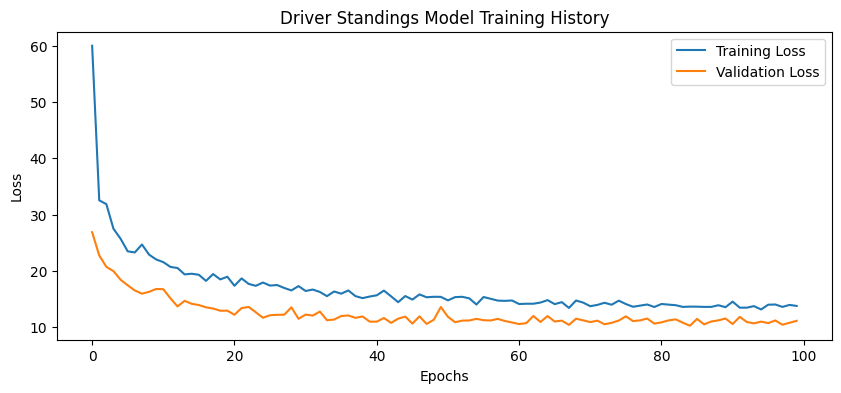

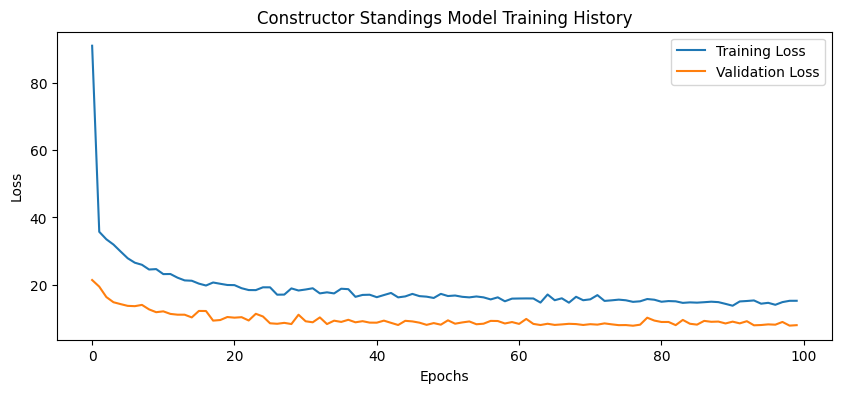

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the training history for driver standings model
plot_training_history(history_driver, 'Driver Standings Model Training History')

# Plot the training history for constructor standings model
plot_training_history(history_constructor, 'Constructor Standings Model Training History')


In [ ]:
# Aggregating driver data
driver_stats = data[data['driverId'] == 4.0][feature_columns].mean()

# Converting to DataFrame for scaling
driver_stats_df = pd.DataFrame([driver_stats])

# Scaling features
driver_stats_scaled = scaler.transform(driver_stats_df)

# Predict driver standings
predicted_driver_standing = model_driver.predict(driver_stats_scaled)
print(f"Predicted Driver Standing for Driver ID 1.0:", predicted_driver_standing[0][0])


1/1 [==============================] - 0s 21ms/step
Predicted Driver Standing for Driver ID 1.0: 9.712772


In [ ]:
# Aggregating constructor data
constructor_stats = data[data['constructorId'] == 131.0][feature_columns].mean()

# Converting to DataFrame for scaling
constructor_stats_df = pd.DataFrame([constructor_stats])

# Scaling features
constructor_stats_scaled = scaler.transform(constructor_stats_df)

# Predict constructor standings
predicted_constructor_standing = model_constructor.predict(constructor_stats_scaled)
print(f"Predicted Constructor Standing for Constructor ID 213.0:", predicted_constructor_standing[0][0])


1/1 [==============================] - 0s 27ms/step
Predicted Constructor Standing for Constructor ID 213.0: 4.213111
